#### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you

### These are the steps required for any data science task or project.

### Data Gathering:
##### a. API
##### b. Web Scraping
##### c. Secondary or primary data from different sources like kaggle, github, etc.

#### Data Cleaning:
##### a. Handle missing values: Impute or remove missing data.
##### b. Remove duplicate records.
##### c. Detect and treat outliers.
##### d. Correct inconsistent data.

#### Data Transformation:
##### a. Feature scaling: Normalize or standardize numerical features.
##### b. Feature encoding: Convert categorical variables into numerical representations.
##### c. Feature engineering: Create new features or transform existing ones.
##### d. Dimensionality reduction: Reduce the number of features.

#### Data Integration:
##### a. Combine data from multiple sources.
##### b. Ensure consistency and compatibility between datasets.

#### Data Reduction:
##### a. Reduce dataset size if necessary.
##### b. Apply sampling techniques if needed.

#### Data Normalization:
##### a. Normalize data for improved efficiency and accuracy.

#### Data Splitting:
##### a. Split the dataset into training, validation, and test sets.

#### Data Visualization:
##### a. Explore data visually to gain insights.

#### Documentation:
##### a. Keep track of preprocessing steps.
##### b. Document assumptions and decisions made. 

In [32]:
#Importing the libraries needed
import pandas as pd

In [33]:
#Imported the libraries needed
#Now loading the dataset
df = pd.read_csv('./car.csv')

In [34]:
#Checking how the data is
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [35]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [36]:
#Checking the data having missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [37]:
#Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### Here we can say that there are 301 rows of data with no missing values, and there are 4 categorical variables and 4 numerical variables

#### So we can move onto the duplicates record

In [38]:
#Checking whether there are duplicates in the data
df.duplicated().sum()

2

In [39]:
#As there are very low duplicates in the data so will drop 
df = df.drop_duplicates()

In [40]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### We have removed duplicates now and will move further onto outlier detection and treatment

<Axes: >

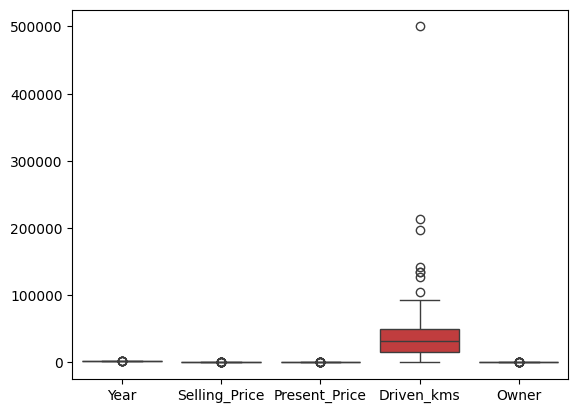

In [41]:
#Libraries we needed for detecting outlier
import seaborn as sns
sns.boxplot(df)

<Axes: xlabel='Driven_kms', ylabel='Density'>

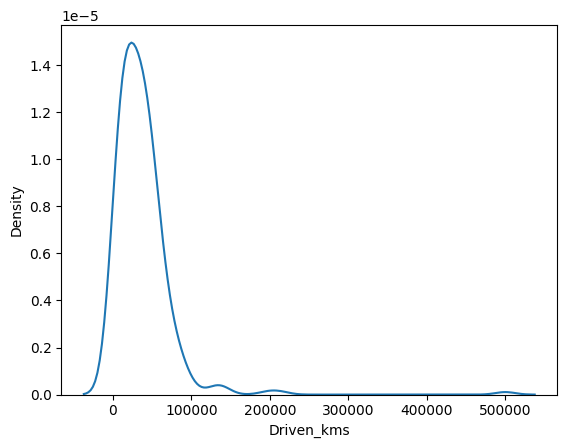

In [42]:
#Checking the distribution of outliered attribute
sns.kdeplot(df['Driven_kms'])

In [43]:

#As we are having the right skewed distribution, so will be transform the data using square root or cube root transformation
df_driven_kms = df['Driven_kms']

# Take absolute value to ensure all values are non-negative
df_driven_kms_abs = df_driven_kms.abs()

# Apply square root transformation to the absolute values
transformed_driven_kms = df_driven_kms_abs.apply(lambda x: x**(1/3))

# Replace the original column with the transformed values
df['Driven_kms'] = transformed_driven_kms

C:\Users\Arvind Kumawat\AppData\Local\Temp\ipykernel_28512\3040650577.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Driven_kms'] = transformed_driven_kms


In [44]:
#Checking the df
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,30.000000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,35.033981,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,19.037783,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,17.324782,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,34.883970,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,32.392306,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,39.148676,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,44.468479,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,20.800838,Diesel,Dealer,Manual,0


<Axes: xlabel='Driven_kms', ylabel='Density'>

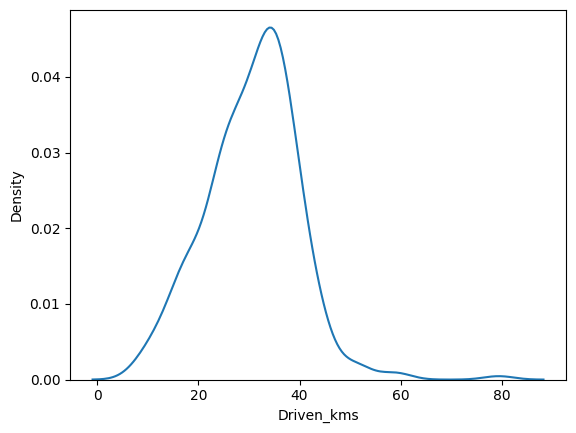

In [45]:
#Checking the distribution
sns.kdeplot(df['Driven_kms'])

<Axes: ylabel='Driven_kms'>

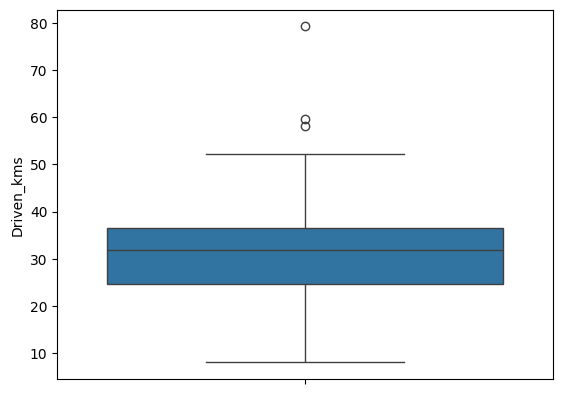

In [46]:
#Visualize the outlier through boxplot
sns.boxplot(df['Driven_kms'])

#### Now converting categorical values to numerical representation. As we are having values which are not showing any rank or ordinality, so we can do it by one hot encoder

In [47]:
#Features to be converted to numerical representation are Fuel_Type, Selling_type, and Transmission
# Importing the libraries needed
from sklearn.preprocessing import OneHotEncoder

# Select the columns we want to one-hot encode
categorical_values = ['Fuel_Type', 'Selling_type', 'Transmission']

# Extract the columns to be encoded from the DataFrame
data_to_encode = df[categorical_values]

# Drop rows with missing values
data_to_encode = data_to_encode.dropna()

# Initialize the OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the data to one-hot encoded format
encoded_data = encoder.fit_transform(data_to_encode)

# Convert the one-hot encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_values))

# Reset the indices of both DataFrames to ensure alignment
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the one-hot encoded DataFrame
# Use original index to ensure proper alignment
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original columns that have been encoded
df = df_encoded.drop(columns=categorical_values)

In [48]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,30.000000,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,35.033981,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,19.037783,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,17.324782,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,swift,2014,4.60,6.87,34.883970,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,32.392306,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
295,brio,2015,4.00,5.90,39.148676,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
296,city,2009,3.35,11.00,44.468479,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
297,city,2017,11.50,12.50,20.800838,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [49]:
##### Now as we are done with the conversion of categorical values so we will move further to scaling the features
# So, the driven_kms is likely to be scaled because its values are having large varying values

In [50]:
# So scaling this feature through MinMaxScaling()
#Importing the libraries needed
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Driven_kms' column
df['Driven_kms'] = scaler.fit_transform(df[['Driven_kms']])

In [51]:
#New df
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,0.308863,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,0.379334,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,0.155401,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,0.131421,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,swift,2014,4.60,6.87,0.377234,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,0.342353,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
295,brio,2015,4.00,5.90,0.436936,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
296,city,2009,3.35,11.00,0.511409,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
297,city,2017,11.50,12.50,0.180082,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [52]:
#The new df with all features required
df = df.drop(columns=['Car_Name'])

In [53]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,0.308863,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2013,4.75,9.54,0.379334,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2017,7.25,9.85,0.155401,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2011,2.85,4.15,0.131421,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2014,4.60,6.87,0.377234,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,2016,9.50,11.60,0.342353,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
295,2015,4.00,5.90,0.436936,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
296,2009,3.35,11.00,0.511409,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
297,2017,11.50,12.50,0.180082,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [54]:
#Creating the confusion matrix
cm = df.corr()

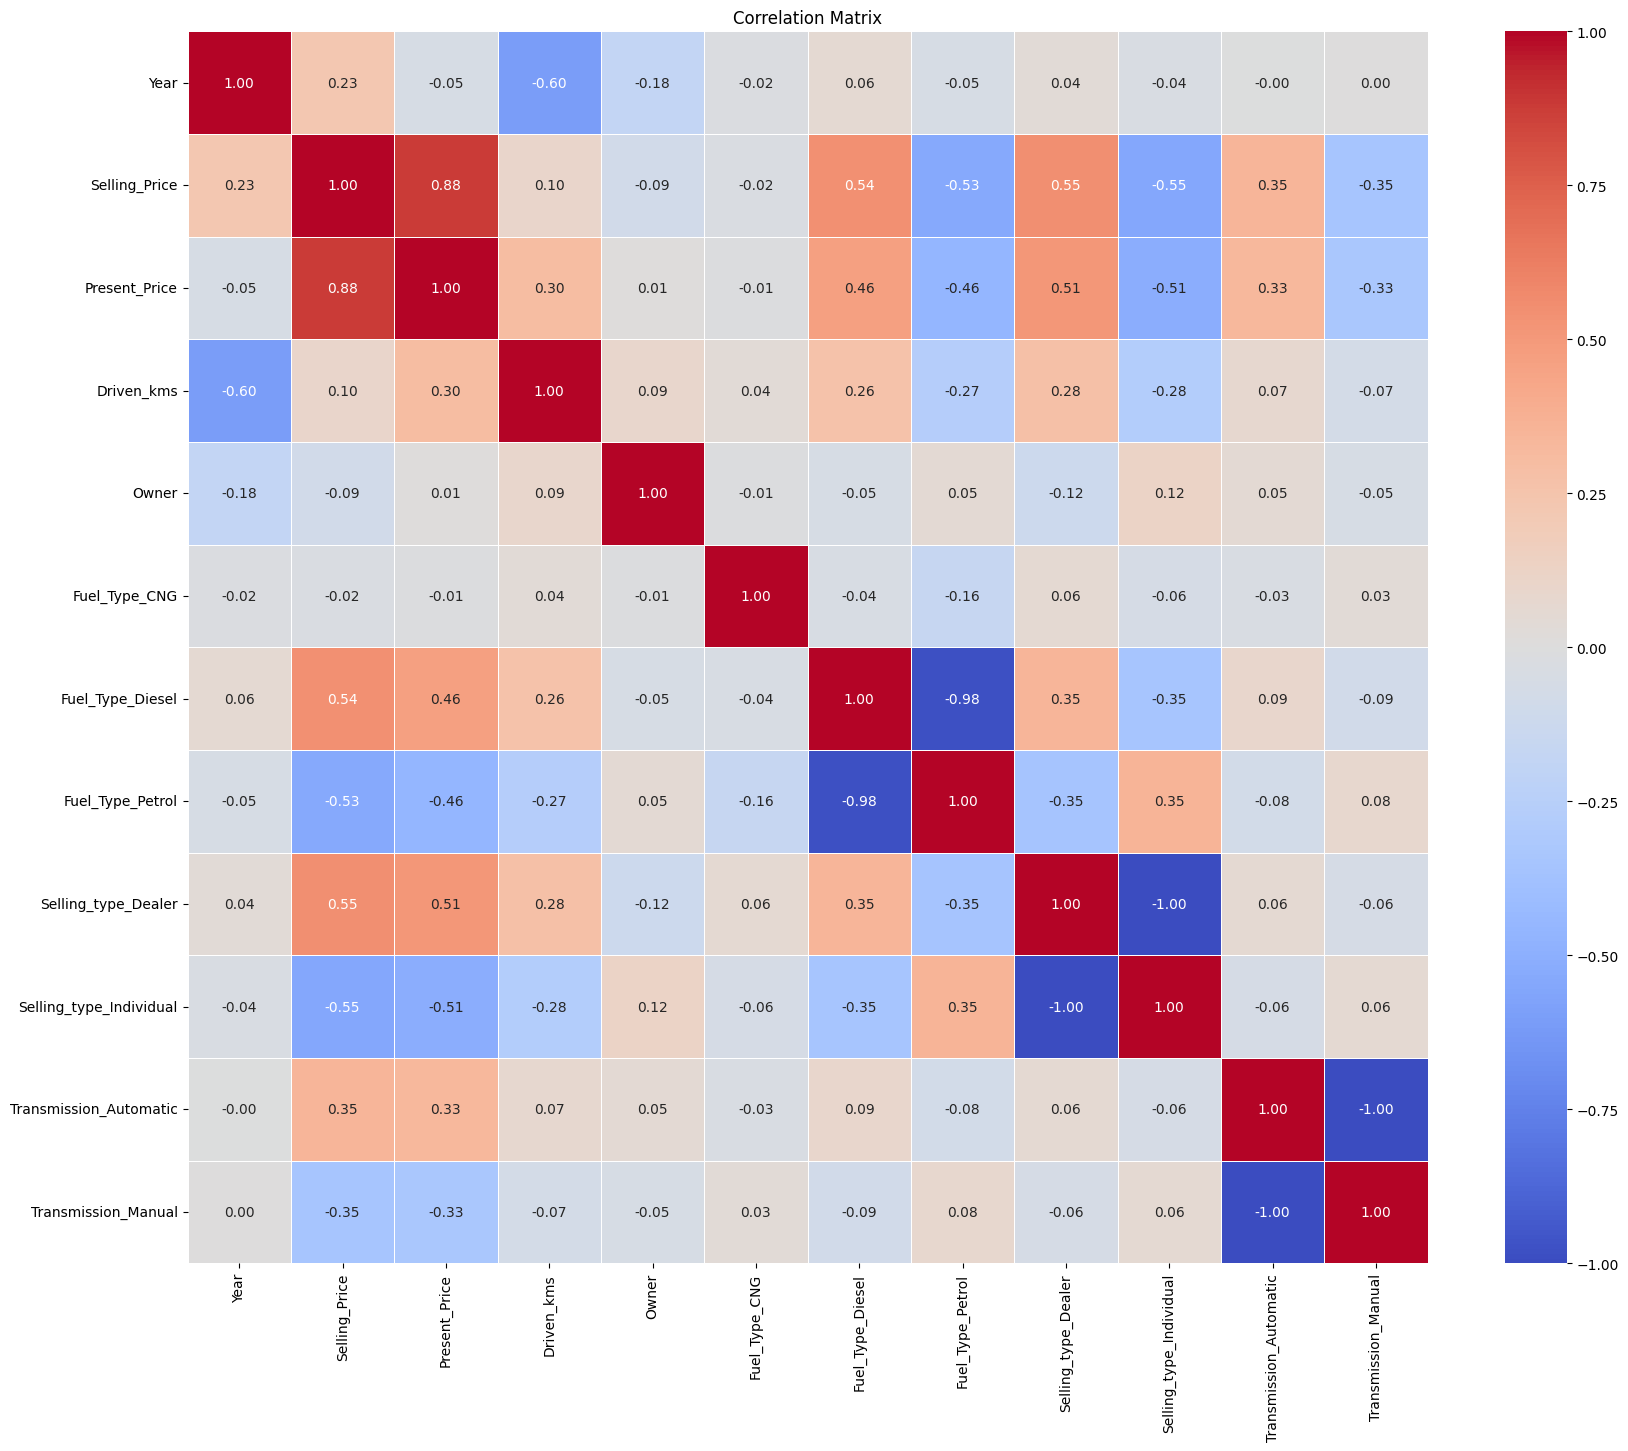

In [55]:
#Importing the libraries needed
import matplotlib.pyplot as plt

# Compute correlation coefficients between features and target variable
correlation_with_target = cm['Selling_Price'].drop('Selling_Price')  # Drop correlation with itself

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [56]:
correlation_with_target

Year                       0.234369
Present_Price              0.876305
Driven_kms                 0.098796
Owner                     -0.087880
Fuel_Type_CNG             -0.024567
Fuel_Type_Diesel           0.543541
Fuel_Type_Petrol          -0.531636
Selling_type_Dealer        0.553851
Selling_type_Individual   -0.553851
Transmission_Automatic     0.348869
Transmission_Manual       -0.348869
Name: Selling_Price, dtype: float64

In [57]:
# Identify highly correlated features with target variable
threshold = 0.3# Adjust threshold as needed
highly_correlated_features_with_target = correlation_with_target[abs(correlation_with_target) > threshold]

In [58]:
highly_correlated_features_with_target

Present_Price              0.876305
Fuel_Type_Diesel           0.543541
Fuel_Type_Petrol          -0.531636
Selling_type_Dealer        0.553851
Selling_type_Individual   -0.553851
Transmission_Automatic     0.348869
Transmission_Manual       -0.348869
Name: Selling_Price, dtype: float64

In [59]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,0.308863,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2013,4.75,9.54,0.379334,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2017,7.25,9.85,0.155401,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2011,2.85,4.15,0.131421,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2014,4.60,6.87,0.377234,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,2016,9.50,11.60,0.342353,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
295,2015,4.00,5.90,0.436936,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
296,2009,3.35,11.00,0.511409,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
297,2017,11.50,12.50,0.180082,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


##### Taking features to be in use are Year, Present_Price, Driven_kms, Owner, Fuel_Type_Diesel, Fuel_Type_CNG, Selling_type_Dealer, Transmission_Manual
##### Regarding Model Selection, we will move onto LinearRegression, Random Forest Regressor, and SVM and check which model is working best

In [60]:
#Moving onto the part is train test split
from sklearn.model_selection import train_test_split
#Splitting into independent and dependent variables
ind = df[['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_CNG', 'Selling_type_Dealer', 'Transmission_Manual']]
dep = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=0)

In [61]:
#Now coming onto the model selection where we will be predicting the car price based on these features.
#Importing the libraries based on the models
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
#Creating an instance of all the models
svr = svm.SVR()
lr = LinearRegression()
#Taking the models in the loop and printing their mean_absolute_error so as to check the accuracy
models = [svr, lr]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Mean Error of {model} is:', mean_absolute_error(y_test, y_pred))

Mean Error of SVR() is: 3.0829497123288565
Mean Error of LinearRegression() is: 1.1392735633515148


In [62]:
#This model is for random forest and taking nestimators.
rfr = RandomForestRegressor(n_estimators=15)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('Mean Error of RandomForestRegressor is:', mean_absolute_error(y_test, y_pred))

Mean Error of RandomForestRegressor is: 0.5444333333333333


#### So, after model fitting, we had checked the accuracy of the model, where we get Random Forest Regressor as the best model to be predicted of the car price.